# Logistic Regression

In [9]:
# importing libraies
# install.packages('caTools')
# install.packages('ElemStatLearn')
library(caTools)
library(ElemStatLearn)
set.seed(123)

In [2]:
# importing dataset
dataset = read.csv('Logistic_Regression/Social_Network_Ads.csv')
dataset = dataset[,3:5]

In [3]:
# creating training and test sets
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [4]:
# Applying feature scaling
training_set[,1:2] = scale(training_set[,1:2])
test_set[,1:2] = scale(test_set[,1:2])

In [5]:
# Fitting Logistic Regression to the training set
classifier = glm(formula = Purchased ~ .,
                family= binomial,
                 data = training_set)

In [6]:
# Predicting the test set result
prob_pred = predict(classifier, 
                    type="response",
                    newdata = test_set[-3])

y_pred = ifelse(prob_pred > 0.5, 1, 0)

In [7]:
# Creating confusion matrix
cm = table(test_set[,3],y_pred)
cm

   y_pred
     0  1
  0 57  7
  1 10 26

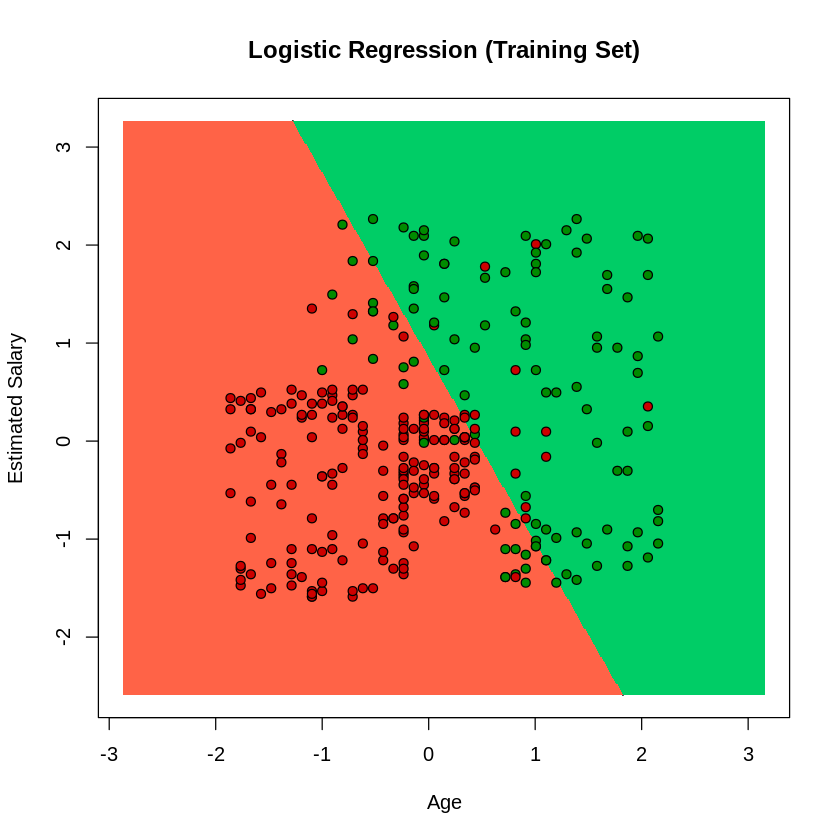

In [13]:
# plotting for training set
set = training_set
X1 = seq(min(set[,1])-1,max(set[,1]) +1, by = 0.01)
X2 = seq(min(set[,2])-1,max(set[,2]) +1, by = 0.01)
grid_set = expand.grid(X1,X2)
colnames(grid_set) = c('Age','EstimatedSalary')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)

plot(set[,-3],
    main = 'Logistic Regression (Training Set)',
    xlab = 'Age', ylab = 'Estimated Salary',
    xlim = range(X1), ylim = range(X2))
contour(X1,X2,matrix(as.numeric(y_grid), length(X1),length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3','tomato'))
points(set, pch = 21, bg = ifelse(set[,3] == 1, 'green4','red3'))

In [ ]:
# Training 
set = test_set
X1 = seq(min(set[,1])-1,max(set[,1]) +1, by = 0.01)
X2 = seq(min(set[,2])-1,max(set[,2]) +1, by = 0.01)
grid_set = expand.grid(X1,X2)
colnames(grid_set) = c('Age','EstimatedSalary')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)

plot(set[,-3],
    main = 'Logistic Regression (Training Set)',
    xlab = 'Age', ylab = 'Estimated Salary',
    xlim = range(X1), ylim = range(X2))
contour(X1,X2,matrix(as.numeric(y_grid), length(X1),length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3','tomato'))
points(set, pch = 21, bg = ifelse(set[,3] == 1, 'green4','red3'))